### Warm Up: 1

In [30]:
import pandas as pd

# Use our Primes Generator from Homework 4
def primes():
    (primesList, num) = ([], 2)
    while(True):
        while(any(num % x == 0 for x in primesList)):
            num += 1
        primesList.append(num)
        yield num

# Generate Primes and Alphabetical letters
n = 10
p = primes()
primeNums = [next(p) for _ in range(n)]
letters = list(map(chr, range(97, 97 + n)))

# Produce Dataframe
pdSeries = pd.Series(primeNums, index = letters)
pdSeries

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

### Warm Up: 2

In [31]:
pattern1 = ['A', 'A', 'a', 'a']
pattern2 = ['A', 'a', 'A', 'a']

# Initialize Columns
tuples = list(zip(*[sum(list(map(lambda x: [x] * 4, ['goat', 'bird', 'llama'])), []),
                    pattern1 * 3,
                    pattern2 * 3]
                 ))

index = pd.MultiIndex.from_tuples(tuples, names = ['animal', 'parent1', 'parent2'])

data = {'score1': list(range(1, 13)), 
        'score2': sum([[2], sum([[2*x] * 2 for x in range(2, 7)], []), [14]], [])
       }

pandasDF = pd.DataFrame(data, index = index)
pandasDF

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### Question: 2

In [32]:
iris = pd.read_csv('iris.csv')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Question: 3

In [33]:
# How many data points are there in this data set?
print('Data points: %d'% (len(iris)))

# What is the shape of the data?
print('Data Shape: ',iris.shape)

# What are the data types of the columns?
print(iris.dtypes)

# What are the column names? 
print(list(iris))

#How many species of flower are included in the data?
print('Number of Species: %d'% (len(iris['Species'].unique())))

#What are the first 10 rows of the data?
iris.head(10)

Data points: 150
Data Shape:  (150, 5)
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object
['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']
Number of Species: 3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Question :4

In [34]:
# 35th row 
print(iris.loc[34])

#The 35th row should read '4.9,3.1,1.5,0.2'
iris.at[34,'Petal.Width'] = 0.2
print('\nCorrected data:')
print(iris.loc[34])

Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.1
Species         setosa
Name: 34, dtype: object

Corrected data:
Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.2
Species         setosa
Name: 34, dtype: object


In [35]:
# 38th row
print(iris.loc[37])

#The 38th row should read '4.9,3.6,1.4,0.1'
iris.at[37,'Sepal.Width'] = 3.6
iris.at[37,'Petal.Length'] = 1.4
print('\nCorrected data:')
print(iris.loc[37])

Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object

Corrected data:
Sepal.Length       4.9
Sepal.Width        3.6
Petal.Length       1.4
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object


### Question :5

In [36]:
iris['Petal.Ratio'] = iris.apply(lambda x: x['Petal.Length'] / x['Petal.Width'], axis = 1)
iris['Sepal.Ratio'] = iris.apply(lambda x: x['Sepal.Length'] / x['Sepal.Width'], axis = 1)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.000000,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.000000,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.500000,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.500000,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.000000,1.388889
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.260870,2.233333
146,6.3,2.5,5.0,1.9,virginica,2.631579,2.520000
147,6.5,3.0,5.2,2.0,virginica,2.600000,2.166667
148,6.2,3.4,5.4,2.3,virginica,2.347826,1.823529


### Question: 6

In [37]:
iris.to_csv("iris_corrected.csv", index = False)

### Question: 7

In [38]:
iris.groupby('Species')[['Petal.Ratio', 'Sepal.Ratio']].agg(['mean', 'median', 'min', 'max', 'std'])

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

### Question: 8

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt 

# i) histogram of the ‘targets’ with respect to each feature of the dataset 
iris_setosa=iris.loc[iris["Species"]=="setosa"]
iris_virginica=iris.loc[iris["Species"]=="virginica"]
iris_versicolor=iris.loc[iris["Species"]=="versicolor"]

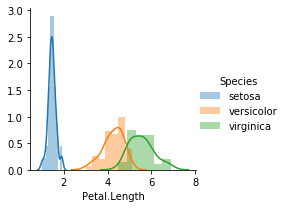

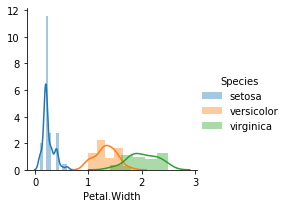

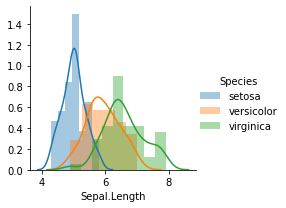

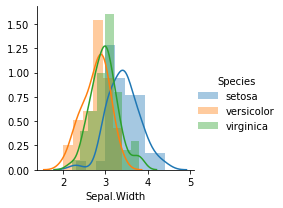

In [40]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"Petal.Length").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"Petal.Width").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"Sepal.Length").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"Sepal.Width").add_legend()

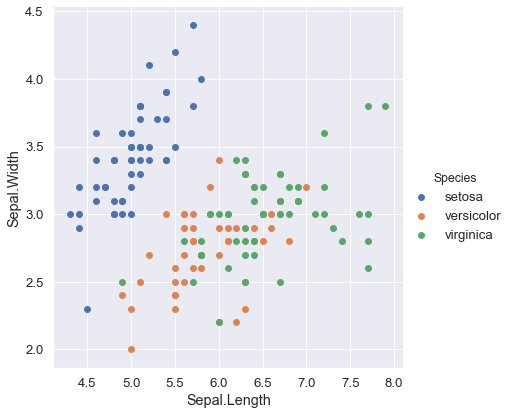

In [41]:
# ii) scatter-plot between ‘sepal width’ and 'sepal length'
sns.set(font_scale=1.2) 
sns.FacetGrid(iris, hue="Species", height=6) \
    .map(plt.scatter, "Sepal.Length", "Sepal.Width", s=35) \
    .add_legend()   

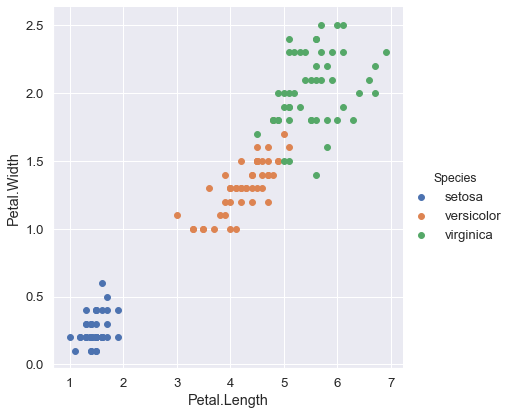

In [42]:
#scatter-plot between ‘petal width’ and 'petal length'
sns.set(font_scale=1.2)
sns.FacetGrid(iris, hue="Species", height=6) \
    .map(plt.scatter, "Petal.Length", "Petal.Width", s=35) \
    .add_legend() 

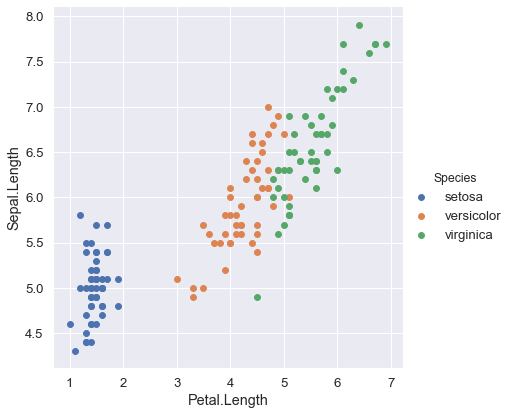

In [43]:
# scatter-plot between ‘sepal length’ and 'petal length'
sns.set(font_scale=1.2)
sns.FacetGrid(iris, hue="Species", height=6) \
    .map(plt.scatter, "Petal.Length", "Sepal.Length", s=35) \
    .add_legend() 

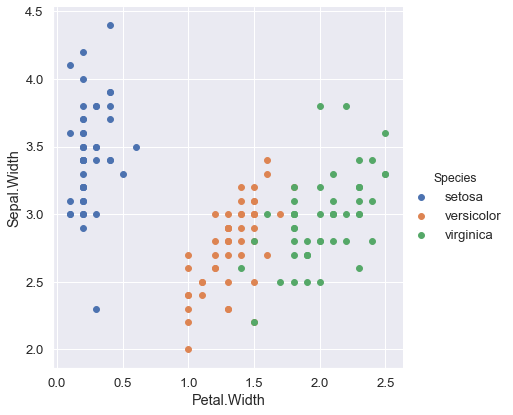

In [44]:
# scatter-plot between ‘sepal width’ and 'petal width'
sns.set(font_scale=1.2)
sns.FacetGrid(iris, hue="Species", height=6) \
    .map(plt.scatter, "Petal.Width", "Sepal.Width", s=35) \
    .add_legend() 

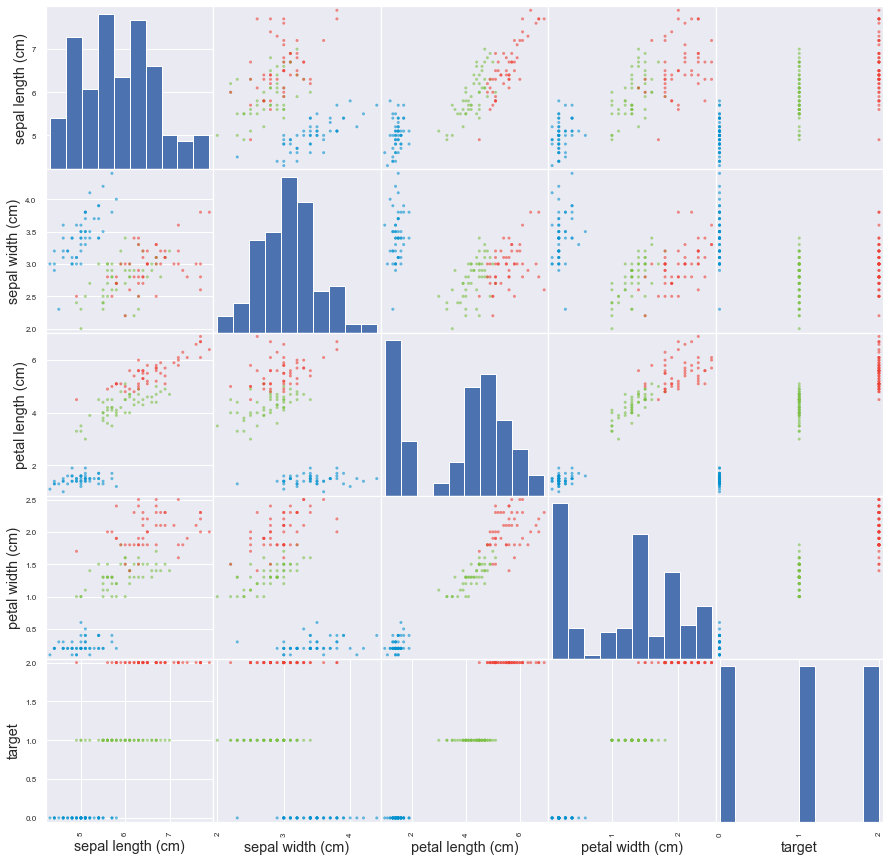

In [45]:
from pandas.plotting import scatter_matrix
from sklearn import datasets

# iii) Use pandas scatter_matrix for plotting all possible combinations along with the histogram. 
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, color=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

### Question: 9

In [46]:
#LOAD IRIS DATASET AND CHECK THE FEATURES
#Import the load_iris function from dataset module
from sklearn.datasets import load_iris

In [47]:
#create bunch object containing iris dataset and its attributes
iris = load_iris()

In [62]:
#Integers repeating the species
# 0: Sentosa
# 1: versicolor
# 2: virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [63]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [65]:
#We habe a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [66]:
#SPLIT THE DATA AND TRAIN THE MODEL

#Splitting the data into training and test sets(80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2, random_state=4)

In [67]:
#Shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [68]:
#Shape of new y objects
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


### Question: 10

In [69]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

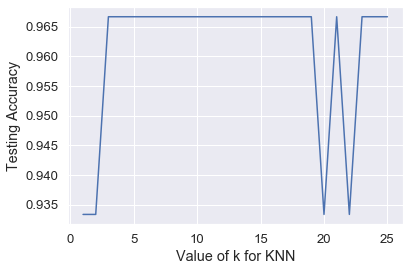

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between k and the testing accuracy
plt.plot(k_range, scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris.data,iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
#0: sentose, 1: versicolor, 2: virginica
classes = {0: 'sentosa', 1: 'versicolor', 2: 'virginica'}

#Making prediction on some unseen data
#predict for the below two random observations

x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
sentosa
